#### Please See the Report for Rationale behind the code


In [1]:
import pandas as pd
import time
from linear_regression_no_numpy import *
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv('housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
median_of_total_bedrooms=housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median_of_total_bedrooms)

In [4]:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [5]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedrooms_per_house']=housing['total_bedrooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["rooms_per_person"] = housing["total_rooms"]/housing["population"]

corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_person      0.209482
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
bedrooms_per_house   -0.045637
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.233303
Name: median_house_value, dtype: float64

In [6]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
rooms_per_house     -0.027540  0.106389           -0.153277     0.133798   
bedrooms_per_house   0.011529  0.065359           -0.060143     0.012883   
bedrooms_per_room    0.081205 -0.098619            0.135622    -0.187381   
rooms_per_pe

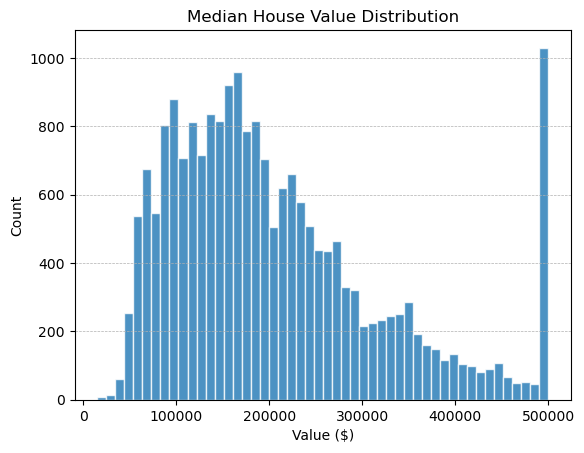

In [7]:
plt.figure()
plt.hist(housing["median_house_value"], bins=50, edgecolor='white', alpha=0.8)
plt.title("Median House Value Distribution")
plt.xlabel("Value ($)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [8]:
housing = housing.drop('total_bedrooms', axis=1)
housing = housing[housing["median_house_value"] < 500001] 
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19675 non-null  float64
 1   latitude                    19675 non-null  float64
 2   housing_median_age          19675 non-null  float64
 3   total_rooms                 19675 non-null  float64
 4   population                  19675 non-null  float64
 5   households                  19675 non-null  float64
 6   median_income               19675 non-null  float64
 7   median_house_value          19675 non-null  float64
 8   rooms_per_house             19675 non-null  float64
 9   bedrooms_per_house          19675 non-null  float64
 10  bedrooms_per_room           19675 non-null  float64
 11  rooms_per_person            19675 non-null  float64
 12  ocean_proximity_<1H OCEAN   19675 non-null  bool   
 13  ocean_proximity_INLAND      19675 no

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15740 entries, 19278 to 3682
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   15740 non-null  float64
 1   latitude                    15740 non-null  float64
 2   housing_median_age          15740 non-null  float64
 3   total_rooms                 15740 non-null  float64
 4   population                  15740 non-null  float64
 5   households                  15740 non-null  float64
 6   median_income               15740 non-null  float64
 7   median_house_value          15740 non-null  float64
 8   rooms_per_house             15740 non-null  float64
 9   bedrooms_per_house          15740 non-null  float64
 10  bedrooms_per_room           15740 non-null  float64
 11  rooms_per_person            15740 non-null  float64
 12  ocean_proximity_<1H OCEAN   15740 non-null  bool   
 13  ocean_proximity_INLAND      15740

In [10]:
train_features = train_set.drop('median_house_value', axis=1)
train_labels = train_set['median_house_value'].copy()

In [11]:
for col in train_features.columns:
    mean = train_features[col].mean()
    std = train_features[col].std()
    train_features[col] = (train_features[col]-mean)/std

In [12]:
w_init = [0.0] * train_features.shape[1] 
b_init = 0.0

train_features = train_features.values.tolist()  
train_labels = train_labels.values.tolist()    

w, b, J_hist, w_hist = gradient_descent(X=train_features,y= train_labels,w_in= w_init, b_in=b_init, cost_function=cost, gradients=gradients, alpha=0.4, num_iters=1000)

Iteration    0: Cost 135232.83   
Iteration  100: Cost 58303.20   
Iteration  200: Cost 58178.28   
Iteration  300: Cost 58162.49   
Iteration  400: Cost 58160.43   
Iteration  500: Cost 58160.16   
Iteration  600: Cost 58160.12   
Iteration  700: Cost 58160.12   
Iteration  800: Cost 58160.12   
Iteration  900: Cost 58160.12   
Iteration  999: Cost 58160.12   
gradient_descent ran in:35.69980369500263 sec


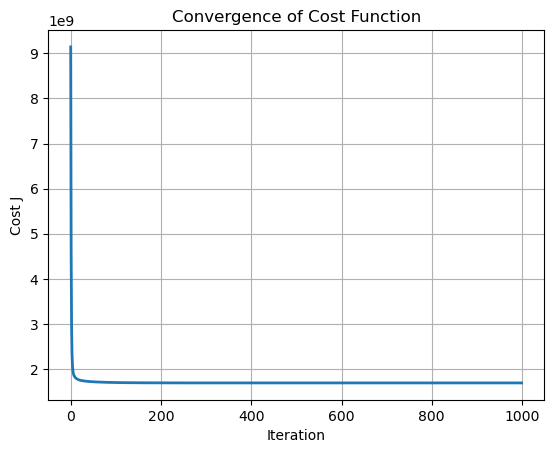

In [16]:
plt.plot(range(len(J_hist)), J_hist, linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Convergence of Cost Function")
plt.grid(True)
plt.show()

In [13]:
test_labels = (test_set['median_house_value'].copy()).values.tolist()
test_features = (test_set.drop('median_house_value', axis=1))

for col in test_features.columns:
    mean = test_features[col].mean()
    std = test_features[col].std()
    test_features[col] = (test_features[col] - mean) / std

test_features = test_features.values.tolist()


In [14]:
pred_labels=predict(train_features,w,b)

rmse=(sum((pred_labels[i]-train_labels[i])**2 for i in range(len(pred_labels)))/len(pred_labels))**0.5
mae = sum(abs(pred_labels[i]-train_labels[i]) for i in range(len(pred_labels)))/len(pred_labels)
r2_score_on_train=r2_score(train_labels,pred_labels)

print(rmse)
print(mae)
print(r2_score_on_train)

58160.11913349883
42404.57523683532
0.6427776485081054


In [15]:
pred_labels=predict(test_features,w,b)

rmse=(sum((pred_labels[i]-test_labels[i])**2 for i in range(len(pred_labels)))/len(pred_labels))**0.5
mae = sum(abs(pred_labels[i]-test_labels[i]) for i in range(len(pred_labels)))/len(pred_labels)
r2_score_on_test=r2_score(test_labels,pred_labels)

print(rmse)
print(mae)
print(r2_score_on_test)

62644.608451183325
45210.297249158204
0.6019359573272527
